Herman Steurs

Dataset: https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

Lineair regressie 

Oefening: lineire regressie uitvoeren op de dataset.
Importeren modules
Data bekijken met Sweetviz
Outliers bekijken 
Omzetten van categorische waarden (type - transmissie) toevoegen.

In [14]:
# Importeren van modules:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

df = pd.read_csv("data/FuelConsumption.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [15]:
# Inlezen data in Sweetviz

import sweetviz as sv

# Gebruik meer specifieke opties
df = pd.read_csv('data/FuelConsumption.csv')


# hack voor bug in de uitvoering
if not hasattr(np, 'VisibleDeprecationWarning'):
    np.VisibleDeprecationWarning = DeprecationWarning

# Laat de eerste paar rijen zien
print(df.head())

report = sv.analyze(df)

# Output het rapport als een HTML-bestand, dit opent ook automatisch in je webbrowser
report.show_html('Report.html')

   Year   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  COEMISSIONS   
0    X              10.5           216  
1    X               9.8           205  
2    Z              13.7           265  
3    Z              15.0           301  
4    X              11.4           230  


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
print(df.columns)

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


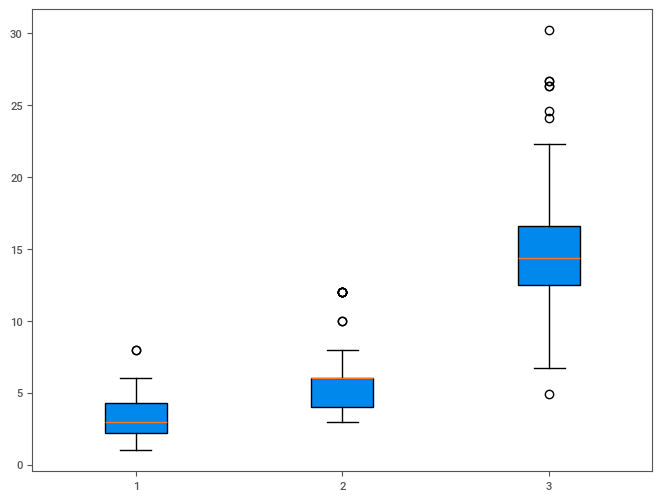

In [29]:
import matplotlib.pyplot as plt


# Boxplot maken voor CO2-emissies
plt.figure(figsize=(8, 6))
plt.boxplot([df['ENGINE SIZE'], df['CYLINDERS'],df['FUEL CONSUMPTION']], vert=True, patch_artist=True)

# Labels en titel
plt.ylabel("")
plt.title("")

# Grafiek tonen
plt.show()

In [30]:
import pandas as pd
import numpy as np

# Laad je DataFrame (voorbeeld)
# df = pd.read_csv("your_data.csv")

def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Selecteer numerieke kolommen
    outliers = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers[col] = outlier_indices
    
    return outliers

# Outliers detecteren
outlier_dict = detect_outliers_iqr(df)

# Print de outlier indices per kolom
for col, indices in outlier_dict.items():
    print(f"Outliers in {col}: {indices}")

Outliers in Year: []
Outliers in ENGINE SIZE: [207, 208]
Outliers in CYLINDERS: [50, 207, 208, 211, 212, 213, 214, 215, 433]
Outliers in FUEL CONSUMPTION: [209, 210, 211, 212, 213, 214, 215, 328]
Outliers in COEMISSIONS : [211, 212, 213, 214, 215, 328]


In [ ]:
df